In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [3]:
nadia=cv2.imread('Data/Nadia_Murad.jpg',0)
denis=cv2.imread('Data/Denis_Mukwege.jpg',0)
solvay=cv2.imread('Data/solvay_conference.jpg',0)

### FACE DETECTION

In [4]:
face_cascade=cv2.CascadeClassifier('Data/haarcascades/haarcascade_frontalface_default.xml')

In [5]:
def detect_face(img):
    face_img=img.copy()
    face_rects=face_cascade.detectMultiScale(face_img)
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
    return face_img

In [6]:
result1=detect_face(nadia)
result2=detect_face(denis)
result3=detect_face(solvay)

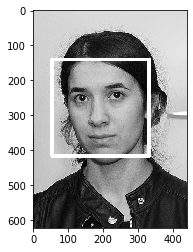

In [7]:
plt.imshow(result1,cmap='gray')

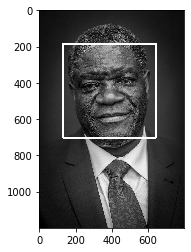

In [8]:
plt.imshow(result2,cmap='gray')

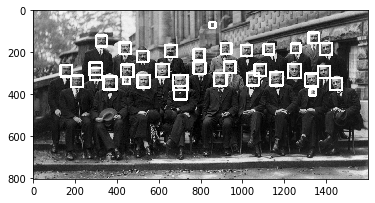

In [9]:
plt.imshow(result3,cmap='gray')

In [10]:
# In above image, some items detected as a face but these are not a face. Also there are some twice detected face. So, we will adjust 
# the detect_face function... 

def adj_detect_face(img):
    face_img=img.copy()
    face_rects=face_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=3)
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
    return face_img

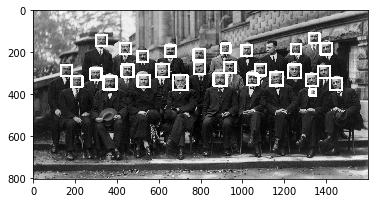

In [11]:
result4=adj_detect_face(solvay)
plt.imshow(result4,cmap='gray')

### EYE DETECTION

In [12]:
eye_cascade=cv2.CascadeClassifier('Data/haarcascades/haarcascade_eye.xml')

In [13]:
def detect_eye(img):
    face_img=img.copy()
    eye_rects=eye_cascade.detectMultiScale(face_img)
    for (x,y,w,h) in eye_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
    return face_img

In [14]:
result5=detect_eye(nadia)
result6=detect_eye(denis)

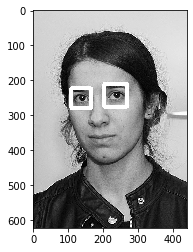

In [15]:
plt.imshow(result5,cmap='gray')

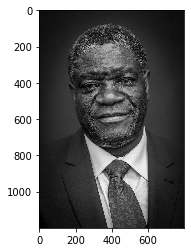

In [16]:
plt.imshow(result6,cmap='gray')
# not able to detect eyes bcoz eye color is same as the skin color...

## VIDEO FACE AND EYE DETECTION

In [23]:
cap=cv2.VideoCapture(0)
while True:
    ret,frame=cap.read()
    frame=detect_face(frame)
    frame=detect_eye(frame)
    cv2.imshow('Video face and eye',frame)
    k=cv2.waitKey(1)
    if k==27:
        break
    
cap.release()
cv2.destroyAllWindows()